# Life Expectancy || EDA and Statistical Analysis

**About Dataset**

Life expectancy is a crucial indicator of a country's overall health and well-being. This project aims to analyze various factors influencing life expectancy across 193 countries using data from 2000 to 2015. The dataset, sourced from the World Health Organization (WHO) and United Nations (UN), includes demographic, economic, and health-related factors that may impact life expectancy.Our goal is to analyze various health, economic, and social factors influencing life expectancy and derive meaningful insights. 

**Overview of the Dataset**

Country :  Name of the country 

Year :  Year of observation (2000-2015) 

Status : Classification of the country as Developed or Developing

Life expectancy :  Average expected lifespan at birth (Target Variable) 

Adult Mortality :  Probability of dying between ages 15-60 per 1000 population 

Infant deaths :  Number of infant deaths per 1000 births

Alcohol  :  Alcohol consumption per capita (liters)

Percentage expenditure :  Expenditure on health as a percentage of GDP 

Hepatitis B  :  Immunization rate for Hepatitis B in children (Percentage)

Measles :  Number of measles cases reported

BMI :  Average Body Mass Index 

Polio :  Immunization rate for Polio (Percentage)

Diphtheria :  Immunization rate for Diphtheria (Percentage)

HIV/AIDS :  Death rate due to HIV/AIDS per 1000 population

GDP :  Gross Domestic Product per capita 

Population :  Total population of the country 

Thinness 1-19 years :  Percentage of underweight individuals aged 1-19 

Thinness 5-9 years :  Percentage of underweight individuals aged 5-9 

Income composition of resources :  Human Development Index (HDI) based measure of income 

Schooling :  Average number of years of schooling

**Objective and Goals**

• Analyze global life expectancy trends using economic, social, and health indicators.

• Identify key drivers influencinglife expectancys across countries


• Explore correlations between GDP, life expectancy, anschooling etcss.

In [471]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [472]:
#Importing and viewing dataset 

df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [473]:
df.shape

(2938, 22)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [475]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [476]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Cleaning columns names

In [478]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [479]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [480]:
col_order = [col for col in df.columns if col!='life_expectancy']+['life_expectancy']
df = df[col_order]

In [481]:
df.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


## Data Cleaning

### Handling missing values

In [484]:
df.isnull().sum()

country                              0
year                                 0
status                               0
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
life_expectancy                     10
dtype: int64

In [485]:
df.isnull().mean().sort_values(ascending=False)*100  ##checking percentage of missing values

population                         22.191967
hepatitis_b                        18.822328
gdp                                15.248468
total_expenditure                   7.692308
alcohol                             6.603131
income_composition_of_resources     5.684139
schooling                           5.547992
thinness_5-9_years                  1.157250
thinness__1-19_years                1.157250
bmi                                 1.157250
polio                               0.646698
diphtheria                          0.646698
life_expectancy                     0.340368
adult_mortality                     0.340368
year                                0.000000
hiv/aids                            0.000000
under-five_deaths                   0.000000
measles                             0.000000
percentage_expenditure              0.000000
infant_deaths                       0.000000
status                              0.000000
country                             0.000000
dtype: flo

Since Life Expectancy is our Target variable. We are dropping which ever rows where life expectancy is null.

In [487]:
df.dropna(subset=['life_expectancy'],inplace=True)

In [488]:
missing_num_cols = df.columns[df.isnull().sum()>0]

for col in missing_num_cols:
    df[col].fillna(df[col].median(),inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_13792\4058352165.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [489]:
df.isnull().sum()

country                            0
year                               0
status                             0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
life_expectancy                    0
dtype: int64

In [490]:
#checking for duplicates

df.duplicated().sum()

0

### Identifing Outliers

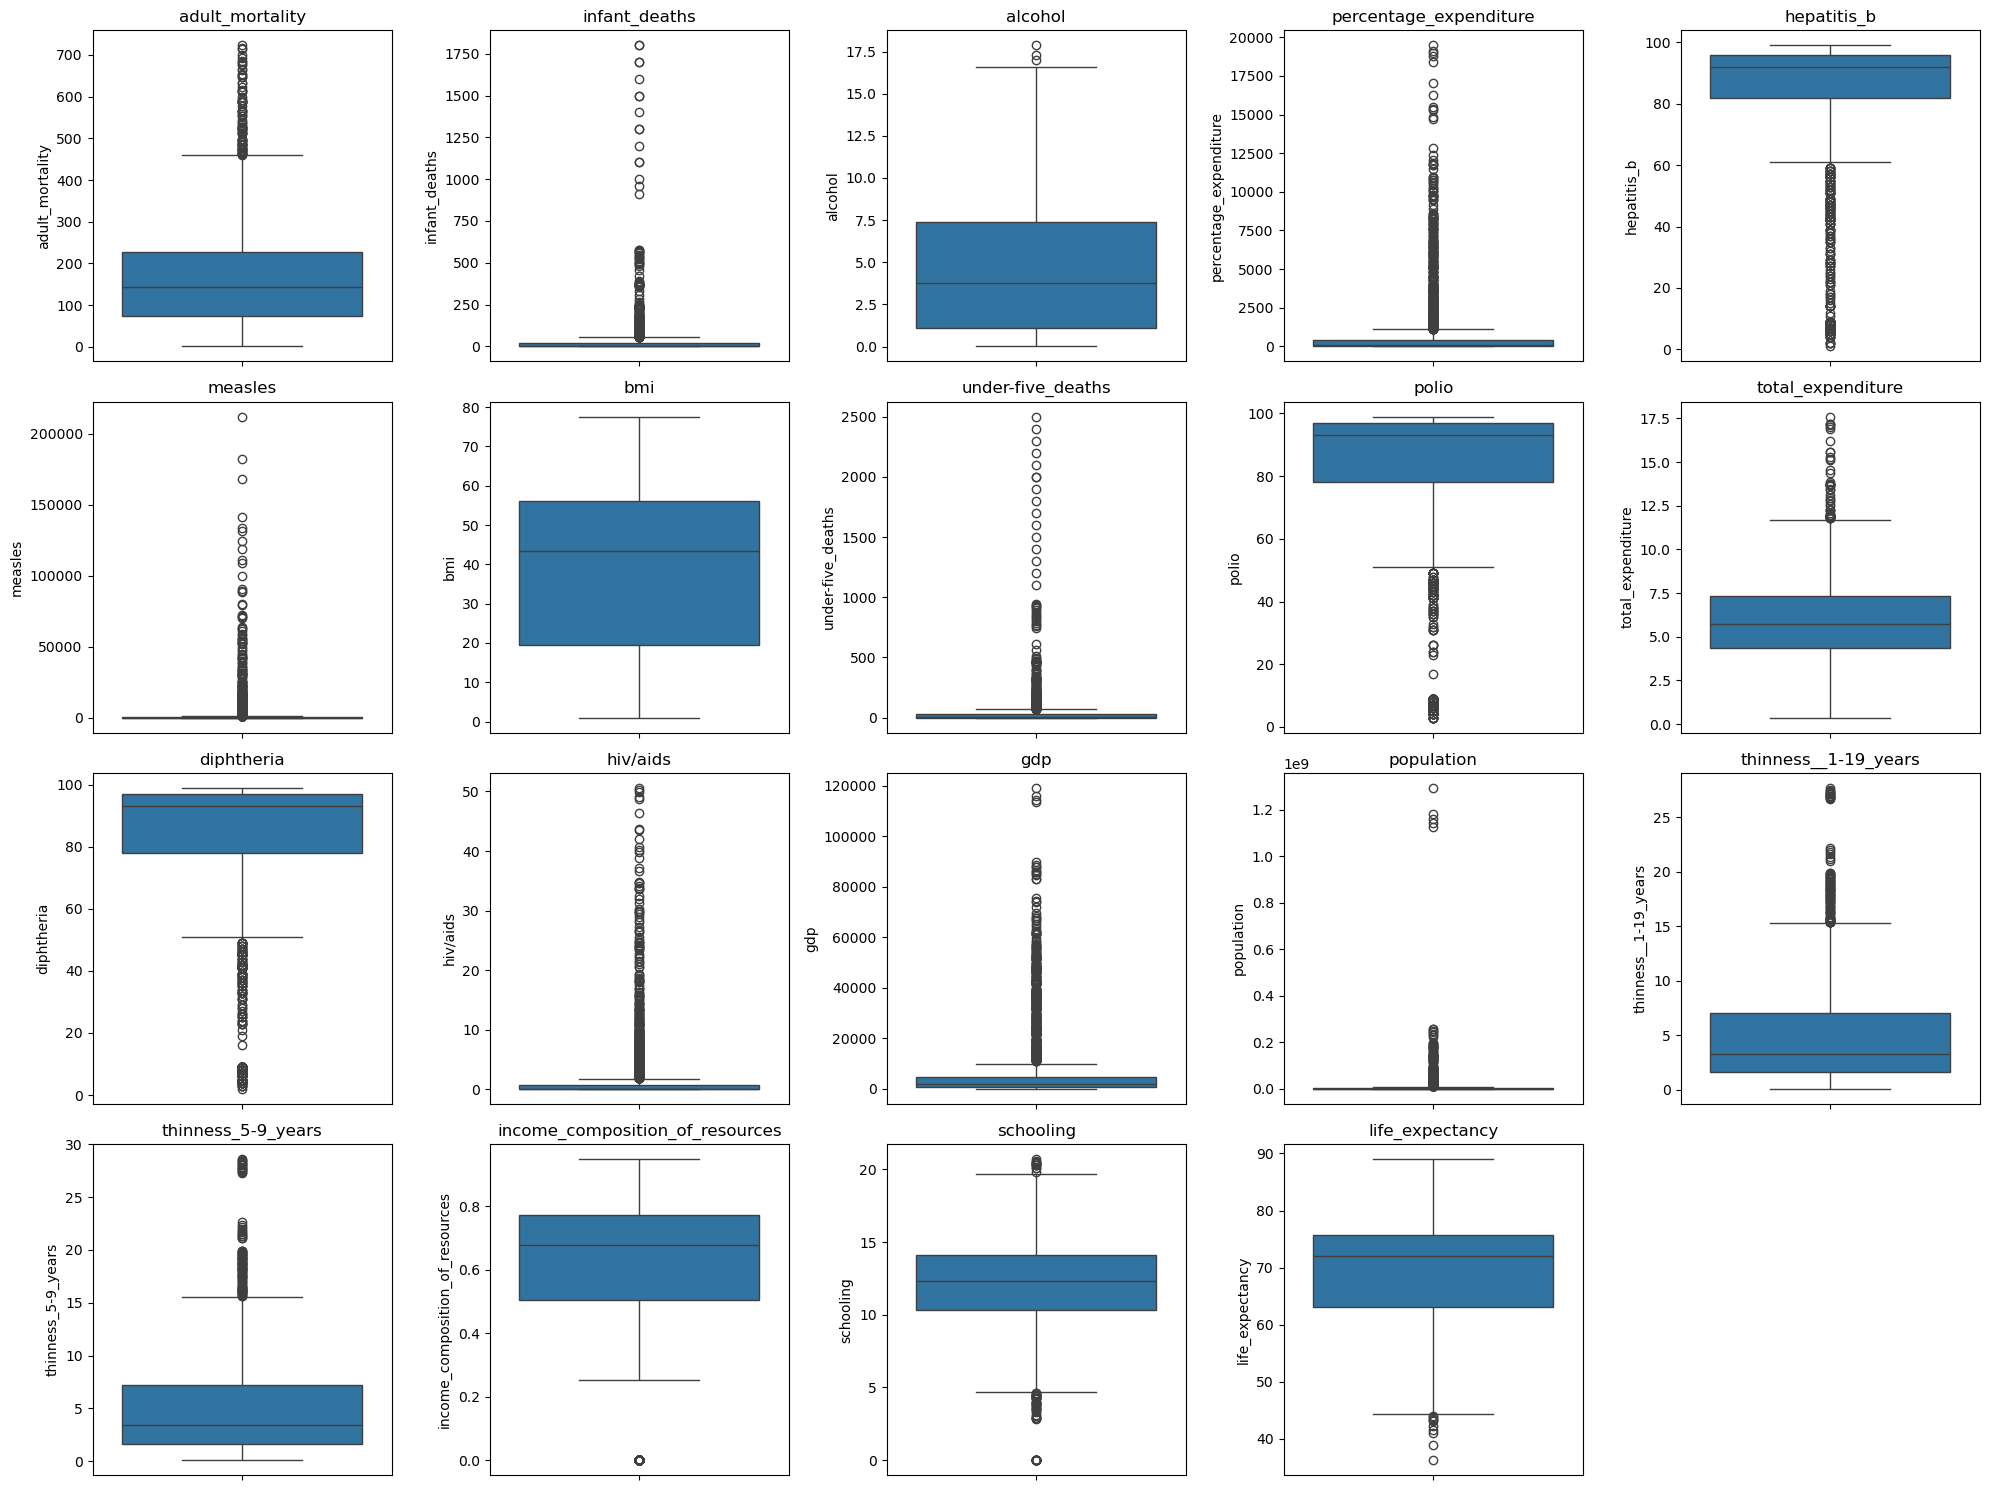

In [492]:
num_cols = df.drop('year',axis=1).select_dtypes(include='number').columns

plt.figure(figsize=(20,15))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,5,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [493]:
def detect_outlier_iqr(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outliers = data[(data[col]<lower_bound) | (data[col]>upper_bound)]
    return outliers.shape[0]

In [494]:
outliers_counts = {col: detect_outlier_iqr(df,col) for col in num_cols}
outliers_counts

{'adult_mortality': 82,
 'infant_deaths': 315,
 'alcohol': 3,
 'percentage_expenditure': 388,
 'hepatitis_b': 320,
 'measles': 542,
 'bmi': 0,
 'under-five_deaths': 394,
 'polio': 278,
 'total_expenditure': 49,
 'diphtheria': 297,
 'hiv/aids': 542,
 'gdp': 445,
 'population': 452,
 'thinness__1-19_years': 100,
 'thinness_5-9_years': 99,
 'income_composition_of_resources': 130,
 'schooling': 75,
 'life_expectancy': 10}

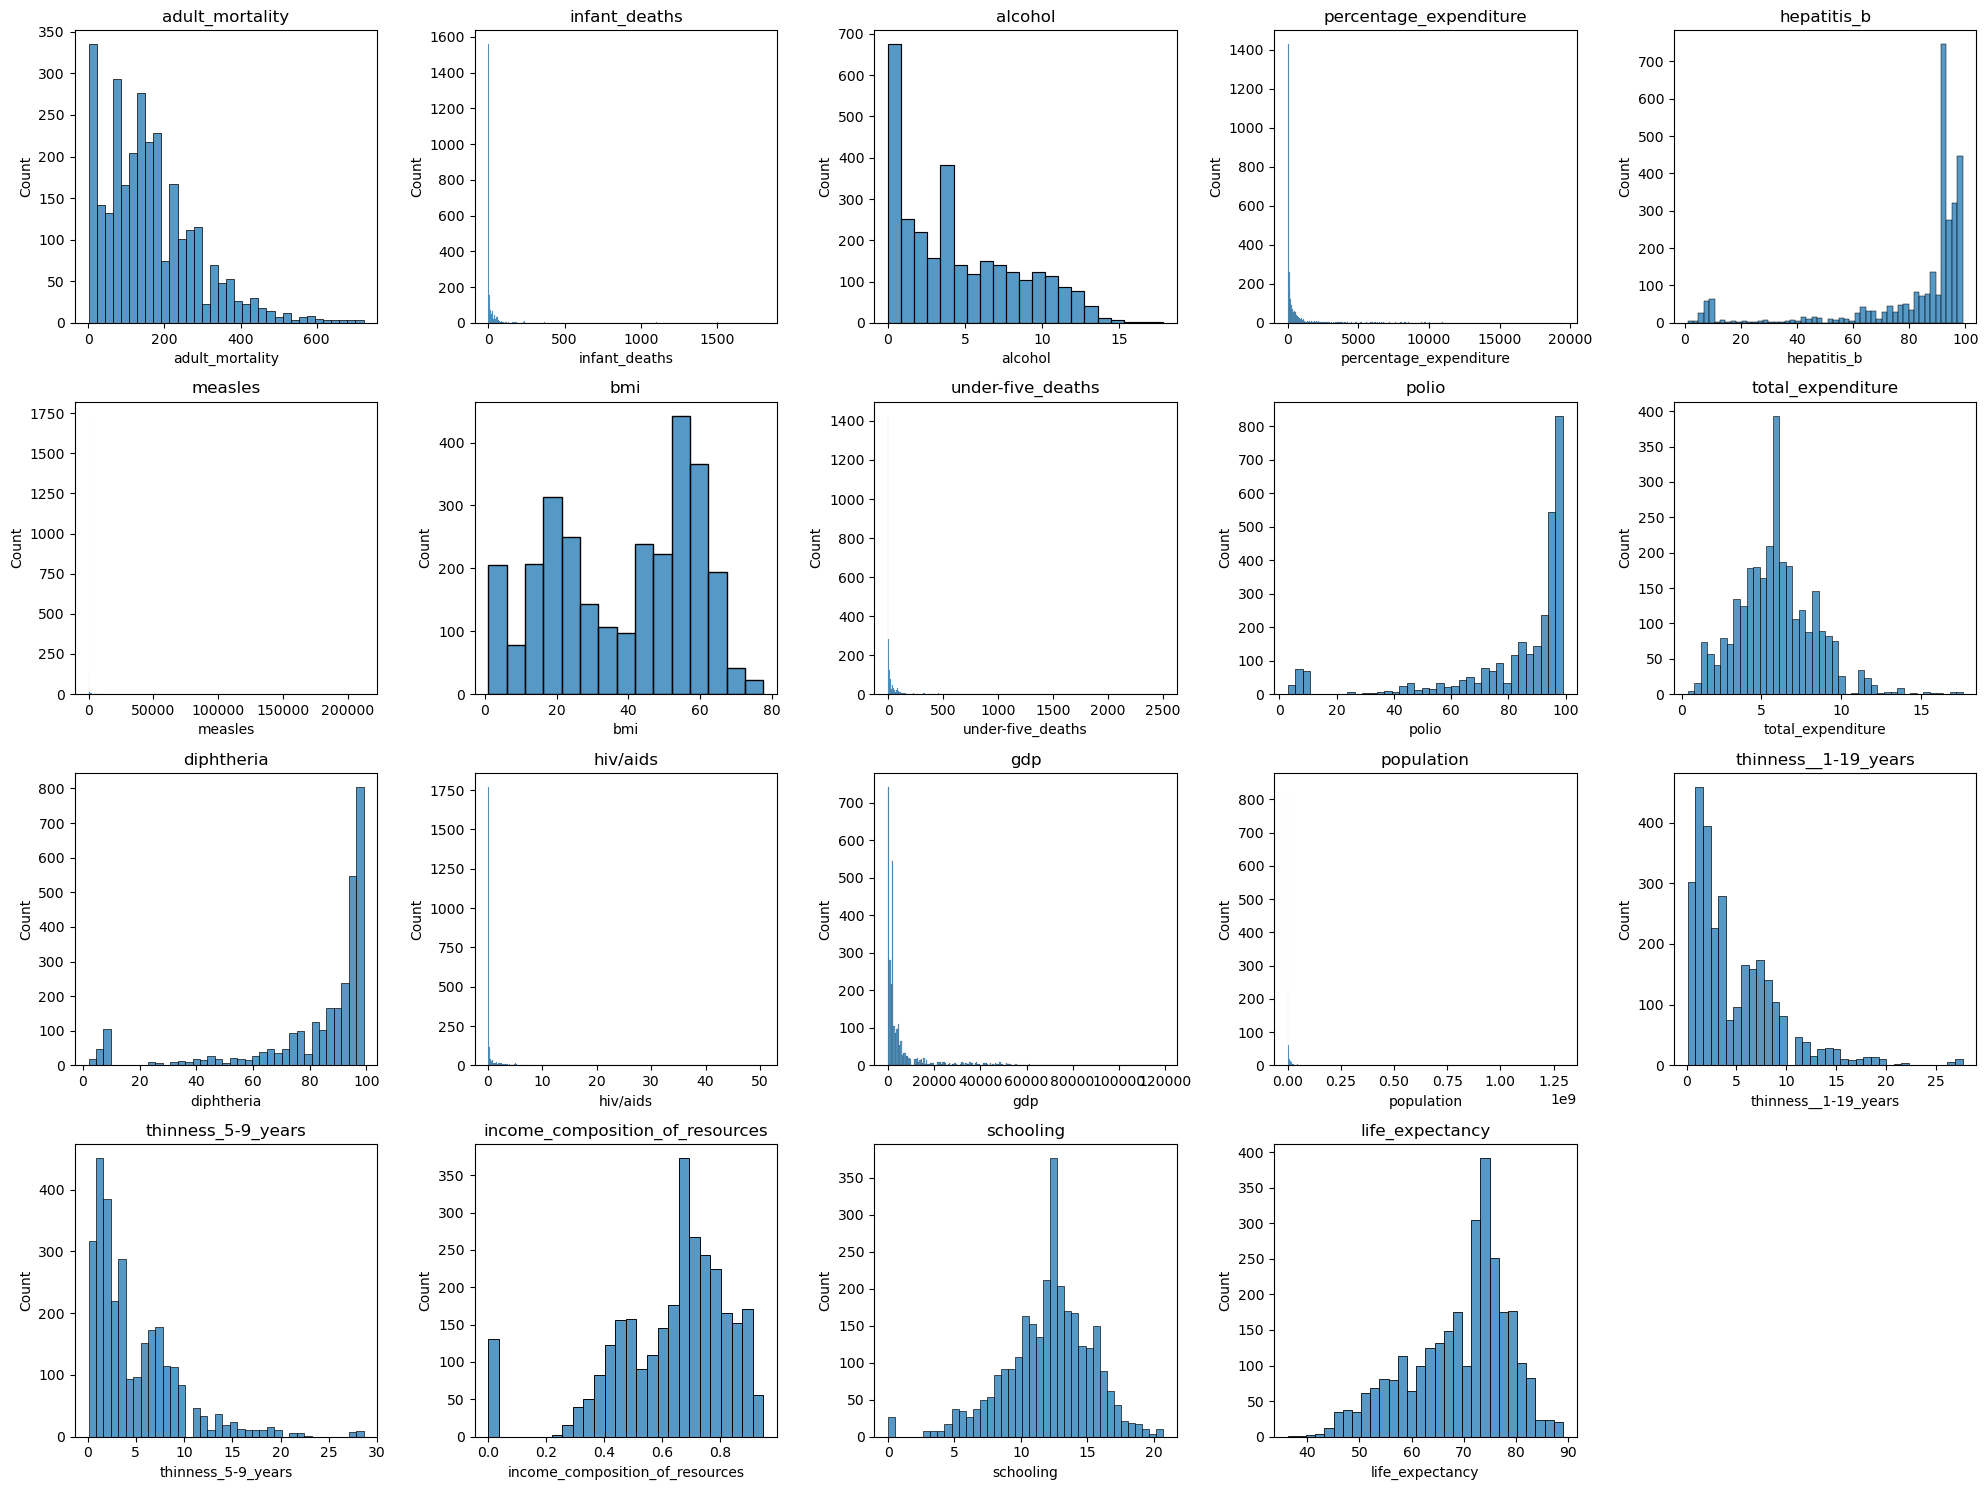

In [495]:
plt.figure(figsize=(20,15))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,5,i)
    sns.histplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Handling Outliers

In [497]:
from scipy.stats.mstats import winsorize

def handle_outliers_iqr(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    return df

def handle_outliers_winsorize(df,column,limits=[0.05,0.05]):
    df[column] = winsorize(df[column],limits=limits)
    return df

def handle_outliers_log(df,column):
    df[column]=np.log1p(df[column])
    return df

for column,num_outliers in outliers_counts.items():
    if num_outliers == 0:
        continue
    elif num_outliers<50:
        df = handle_outliers_iqr(df,column)
    elif num_outliers>=50 and num_outliers <300:
        df = handle_outliers_winsorize(df,column)
    else:
        df = handle_outliers_log(df,column)  

In [498]:
new_outlier_counts ={col:detect_outlier_iqr(df,col) for col in num_cols}
new_outlier_counts

{'adult_mortality': 0,
 'infant_deaths': 0,
 'alcohol': 0,
 'percentage_expenditure': 0,
 'hepatitis_b': 379,
 'measles': 0,
 'bmi': 0,
 'under-five_deaths': 0,
 'polio': 273,
 'total_expenditure': 14,
 'diphtheria': 291,
 'hiv/aids': 414,
 'gdp': 30,
 'population': 135,
 'thinness__1-19_years': 0,
 'thinness_5-9_years': 0,
 'income_composition_of_resources': 0,
 'schooling': 0,
 'life_expectancy': 5}

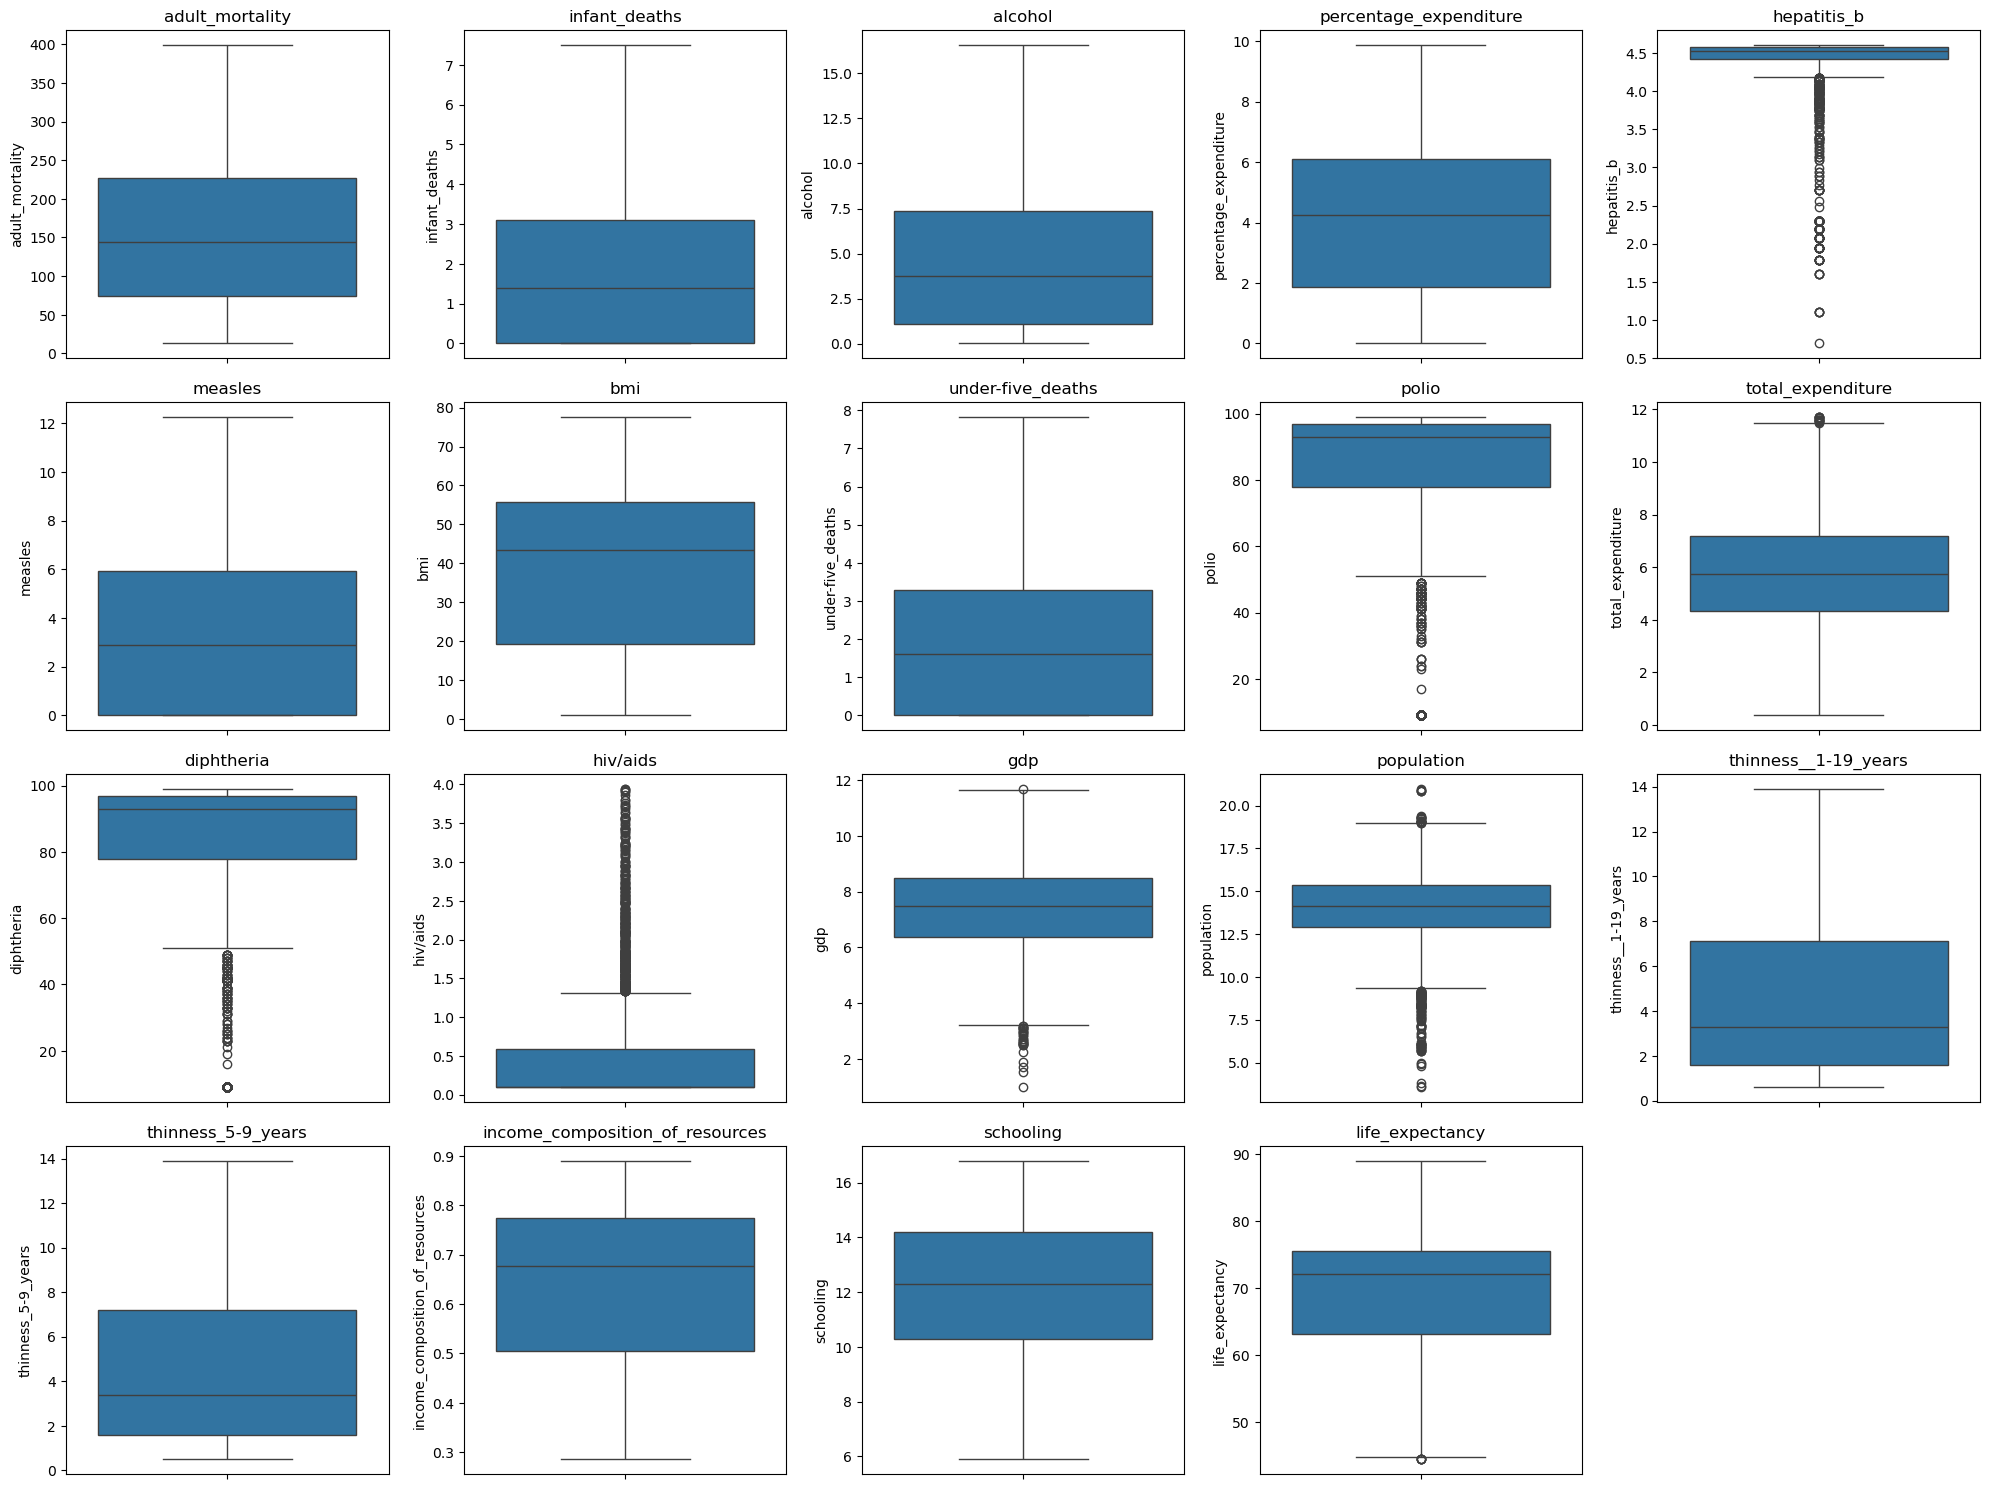

In [499]:
plt.figure(figsize=(20,15))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,5,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Standardizing data

Since there are some outliers existing, I chose StandardScaler as my normalization method,because it is less sensitive to outliers than MinMaxScaler

In [502]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2 =df.copy()

df2[num_cols] = scaler.fit_transform(df2[num_cols])

In [503]:
df2.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy
0,Afghanistan,2015,Developing,0.946203,1.426414,-1.15788,0.093647,-0.247152,1.124930,-0.964260,...,1.097015,-0.750874,-0.542922,-0.641566,1.439366,2.449178,2.437059,-0.962856,-0.677103,-0.460756
1,Afghanistan,2014,Developing,1.019423,1.445202,-1.15788,0.104891,-0.327237,0.864614,-0.989580,...,1.106240,-0.879317,-0.542922,-0.614146,-0.535069,2.449178,2.437059,-0.980458,-0.711591,-1.004793
2,Afghanistan,2013,Developing,0.991966,1.463421,-1.15788,0.103386,-0.273435,0.823518,-1.014900,...,1.083179,-0.793688,-0.542922,-0.596481,1.413266,2.449178,2.437059,-1.015663,-0.746080,-1.004793
3,Afghanistan,2012,Developing,1.028576,1.489753,-1.15788,0.127201,-0.195759,1.394382,-1.040219,...,1.263052,-0.665245,-0.542922,-0.562591,0.497403,2.449178,2.437059,-1.056735,-0.780568,-1.047463
4,Afghanistan,2011,Developing,1.056033,1.506689,-1.15788,-0.711412,-0.170626,1.418215,-1.060475,...,0.963264,-0.622430,-0.542922,-1.915779,0.405358,2.449178,2.437059,-1.109543,-0.884034,-1.079465


## EDA

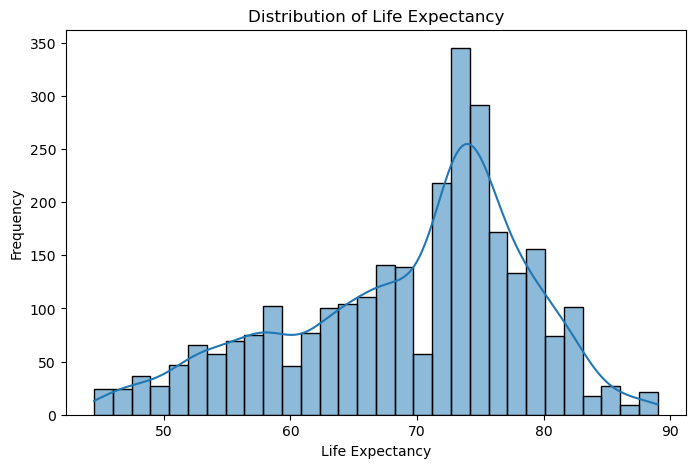

In [505]:
#Distribution of life expectancy

plt.figure(figsize=(8,5))
sns.histplot(df['life_expectancy'], bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()



The distribution appears right-skewed, indicating that most countries have life expectancies clustered around the mid-to-high range, but some have very low values.

A peak is observed in the 60–70 range, which means most countries fall within this life expectancy bracket.

The presence of lower values suggests some countries experience significantly lower life expectancy.

C:\Users\anant\AppData\Local\Temp\ipykernel_13792\1545447183.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='year',y='life_expectancy',ci=None)


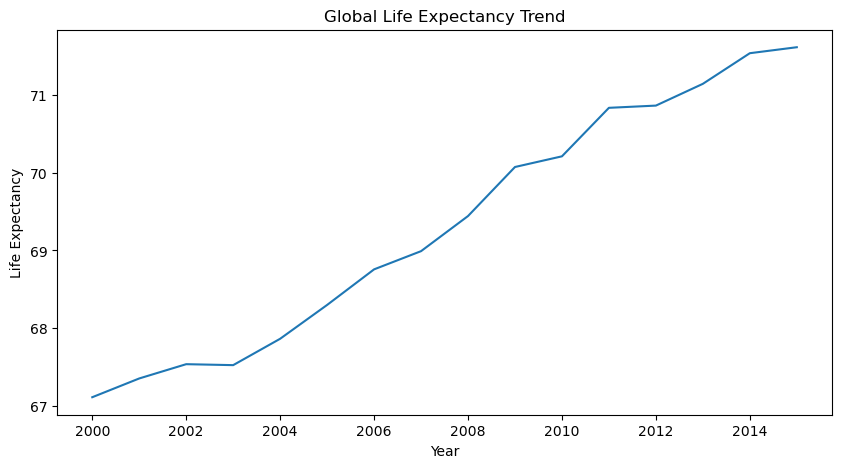

In [507]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='life_expectancy',ci=None)
plt.title('Global Life Expectancy Trend')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

The global life expectancy shows a consistent upward trend from 2000 to 2015

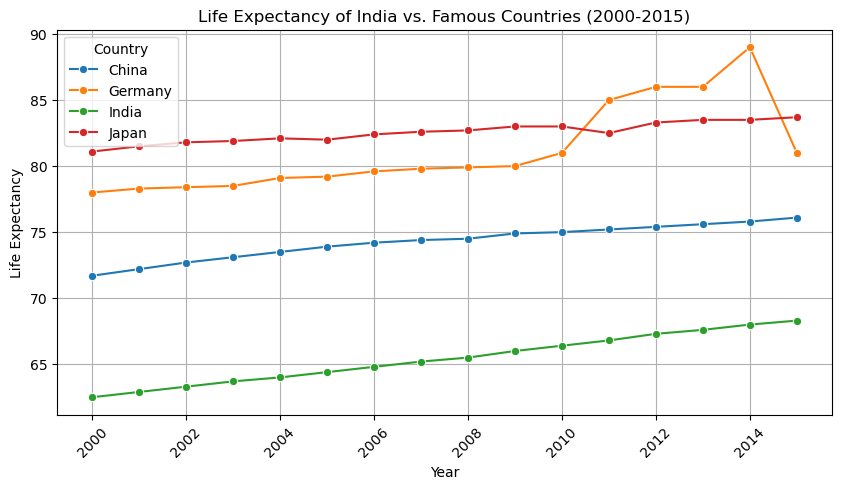

In [509]:
#India vs Famous Countries

famous_countries = ["India", "United States", "China", "United Kingdom", "Germany", "Japan"]
df_famous = df[df["country"].isin(famous_countries)]


plt.figure(figsize=(10, 5))
sns.lineplot(data=df_famous, x="year", y="life_expectancy", hue="country", marker="o")
plt.title("Life Expectancy of India vs. Famous Countries (2000-2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(title="Country")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


India's life expectancy has been steadily rising from ~62 years in 2000 to ~68 years in 2015.

India lags behind Germany and Japan by over a decade in life expectancy.

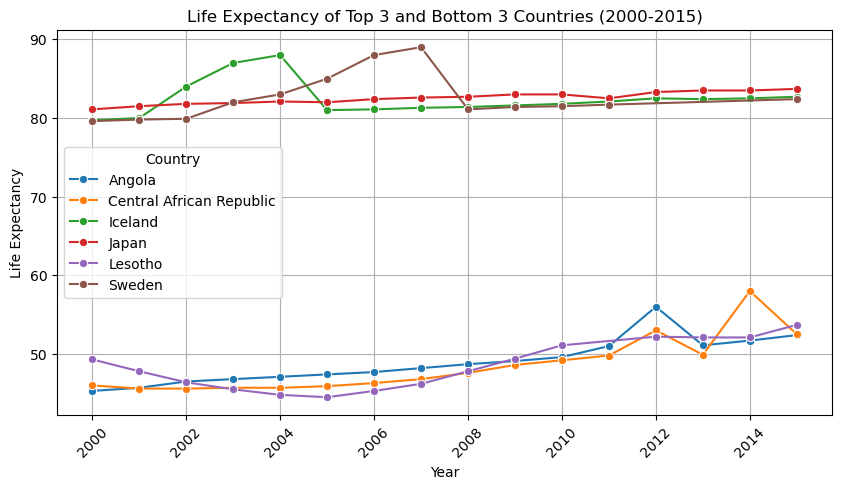

In [511]:
#top 3countries vs bottom 3countries

country_avg_life_exp = df.groupby('country')['life_expectancy'].mean()
top_3 = country_avg_life_exp.nlargest(3).index.tolist()
bottom_3 = country_avg_life_exp.nsmallest(3).index.tolist()

df_top_bottom = df[df['country'].isin(top_3 + bottom_3)]

plt.figure(figsize=(10,5))
sns.lineplot(data=df_top_bottom, x="year", y="life_expectancy", hue="country", marker="o")
plt.title("Life Expectancy of Top 3 and Bottom 3 Countries (2000-2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(title="Country")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Countries like Japan, Sweden, and Iceland consistently maintain high life expectancy (~80-89 years).


On the other hand, Angola, Central African Republic, and Lesotho struggle with low life expectancy (~45-55 years).


C:\Users\anant\AppData\Local\Temp\ipykernel_13792\500424309.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='year',y='life_expectancy',hue='status',ci=None)


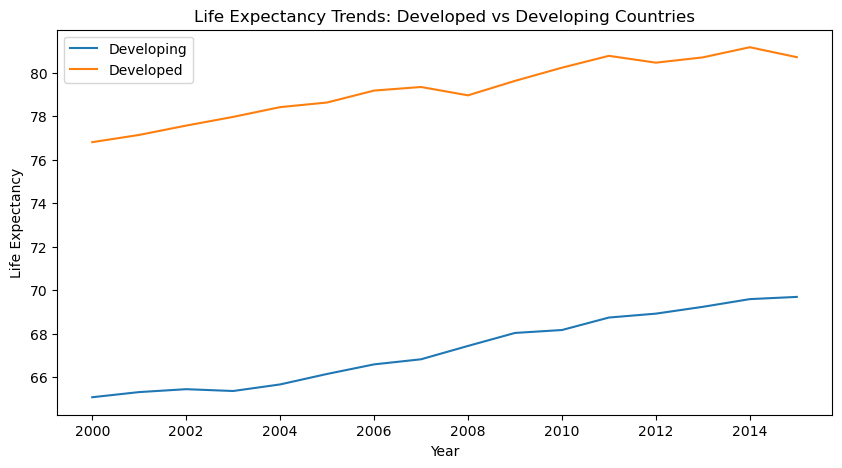

In [513]:
#Developed vs Developing Countries


plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='life_expectancy',hue='status',ci=None)
plt.title("Life Expectancy Trends: Developed vs Developing Countries")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(["Developing", "Developed"])
plt.show()

Life expectancy in developed countries starts at ~76.5 years in 2000 and increases to ~81 years by 2015.

This reflects better healthcare, nutrition, sanitation, and living conditions.

Developing nations start with ~65 years in 2000 and rise to ~70 years by 2015.

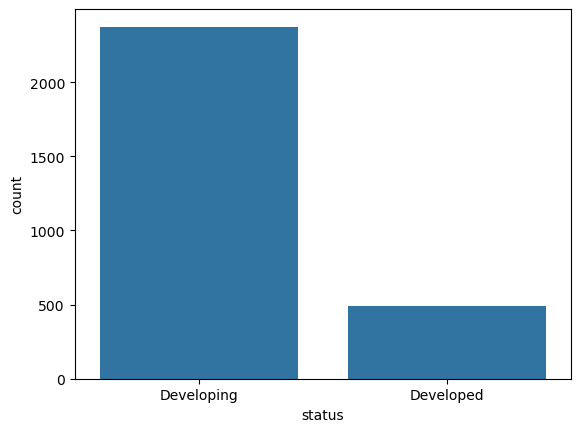

In [515]:
sns.countplot(x=df['status'])
plt.show()

In [516]:
#dropping country,year since it is not requied

df.drop(columns= ['country','year'],inplace=True)



The "Country" column is a categorical variable that does not provide meaningful numerical information for statistical modeling.

Since we are focusing on statistical relationships rather than time-series forecasting, including "Year" could bias the model.

The year itself does not directly influence life expectancy, but its associated trends (like improvements in healthcare) do.

In [518]:
#Encoding Category variable STATUS

df['status']=df['status'].map({'Developing':0,'Developed':1})

In [519]:
df

,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy
0,0,263.0,4.143135,0.01,4.280542,4.189655,7.051856,19.1,4.430817,9.0,8.16,65.0,0.095310,6.372055,17.334091,13.9,13.9,0.479,10.1,65.0
1,0,271.0,4.174387,0.01,4.311116,4.143135,6.200509,18.6,4.465908,58.0,8.18,62.0,0.095310,6.419501,12.699497,13.9,13.9,0.476,10.0,59.9
2,0,268.0,4.204693,0.01,4.307023,4.174387,6.066108,18.1,4.499810,62.0,8.13,64.0,0.095310,6.450067,17.272826,13.9,13.9,0.470,9.9,59.9
3,0,272.0,4.248495,0.01,4.371777,4.219508,7.933080,17.6,4.543295,67.0,8.52,67.0,0.095310,6.508708,15.123021,13.9,13.9,0.463,9.8,59.5
4,0,275.0,4.276666,0.01,2.091507,4.234107,8.011023,17.2,4.584967,68.0,7.87,68.0,0.095310,4.167242,14.906964,13.9,13.9,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0,399.0,3.367296,4.14,2.273919,4.189655,6.042633,27.5,3.784190,69.0,6.44,68.0,3.443618,6.099794,11.770919,9.0,9.0,0.406,9.3,44.6
2934,0,399.0,3.295837,4.06,0.000000,2.079442,6.906755,26.7,3.737670,9.0,6.52,68.0,3.629660,6.118870,16.351894,9.8,9.9,0.418,9.5,44.5
2935,0,73.0,3.258097,4.43,0.000000,4.304065,5.720312,26.3,3.713572,73.0,6.53,71.0,3.708682,4.066431,11.740268,1.2,1.3,0.427,10.0,44.8
2936,0,399.0,3.258097,1.72,0.000000,4.343805,6.272877,25.9,3.688879,76.0,6.16,75.0,3.763523,6.309168,16.330475,1.6,1.7,0.427,9.8,45.3


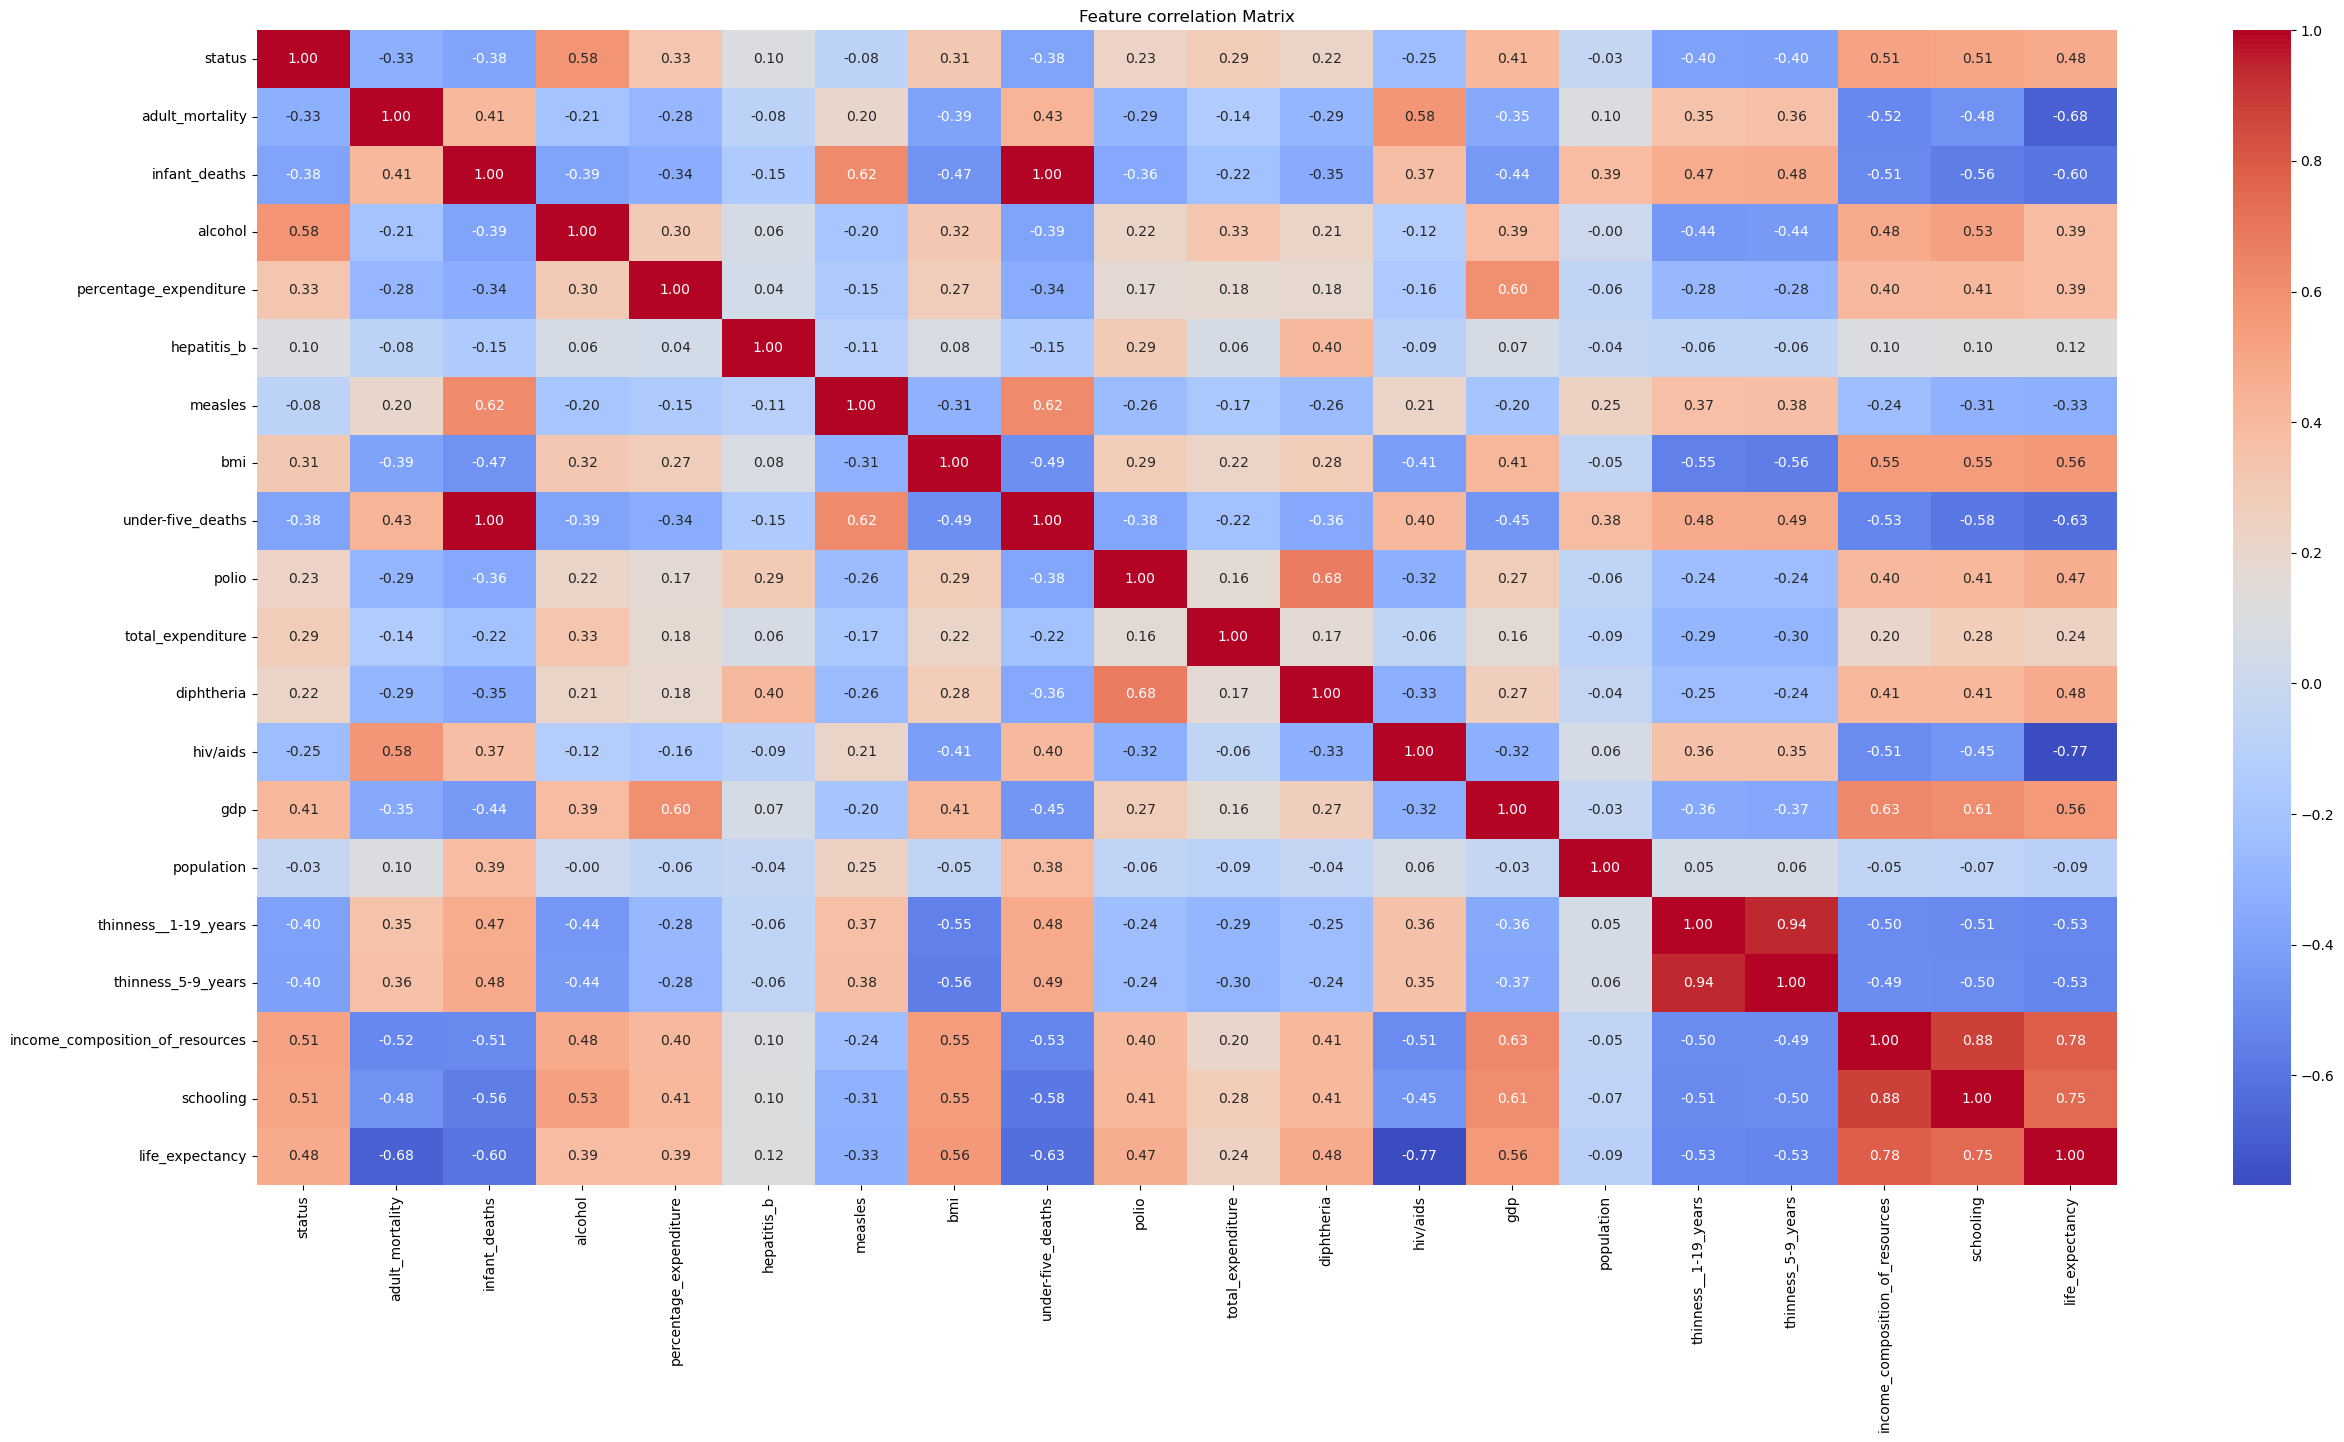

In [520]:
corr_matrix = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Feature correlation Matrix')
plt.savefig("corr_matrix.png")
plt.show()

C:\Users\anant\AppData\Local\Temp\ipykernel_13792\708187930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_life_exp.index,y=correlation_with_life_exp.values,palette=colors)


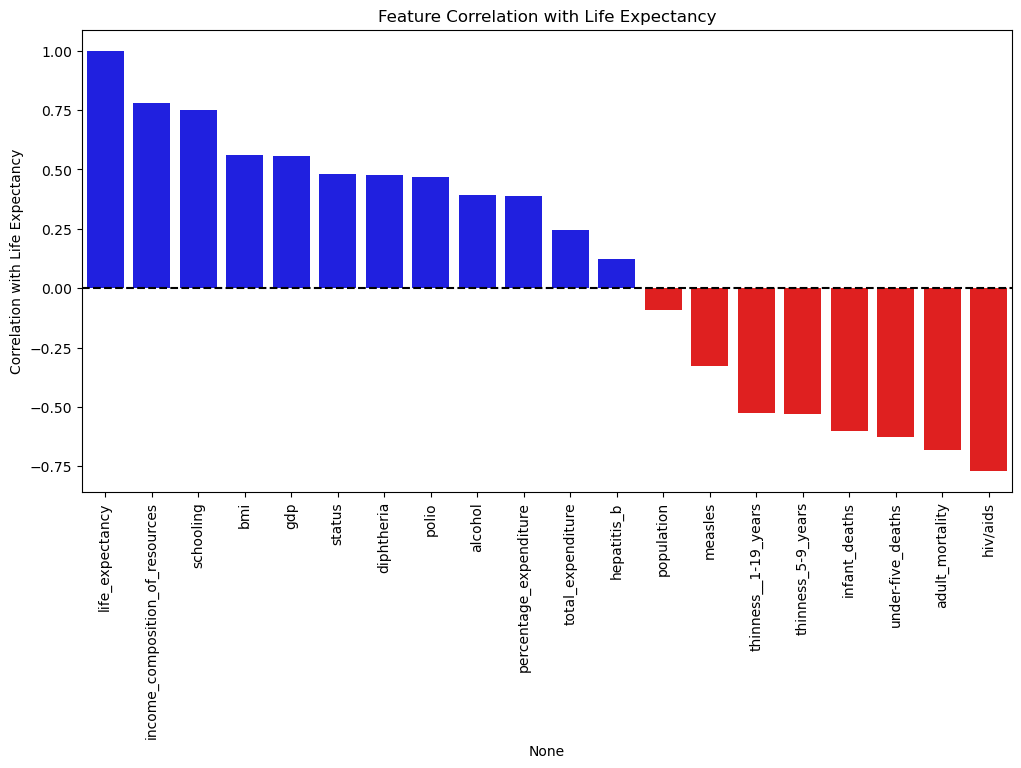

In [521]:
correlation_with_life_exp = df.corr()['life_expectancy'].sort_values(ascending=False)

colors = ['red' if x<0 else 'blue' for x in correlation_with_life_exp]

plt.figure(figsize=(12,6))
sns.barplot(x=correlation_with_life_exp.index,y=correlation_with_life_exp.values,palette=colors)
plt.xticks(rotation=90)
plt.ylabel('Correlation with Life Expectancy')
plt.title('Feature Correlation with Life Expectancy')
plt.axhline(0, color='black', linewidth=1.5, linestyle="--")
plt.show()

Features like Income Composition of Resources, Schooling, and GDP show strong positive correlation, meaning countries with higher values in these areas tend to have higher life expectancy.

HIV/AIDS, Adult Mortality, and Deaths have strong negative correlations, meaning higher values in these features lead to lower life expectancy.



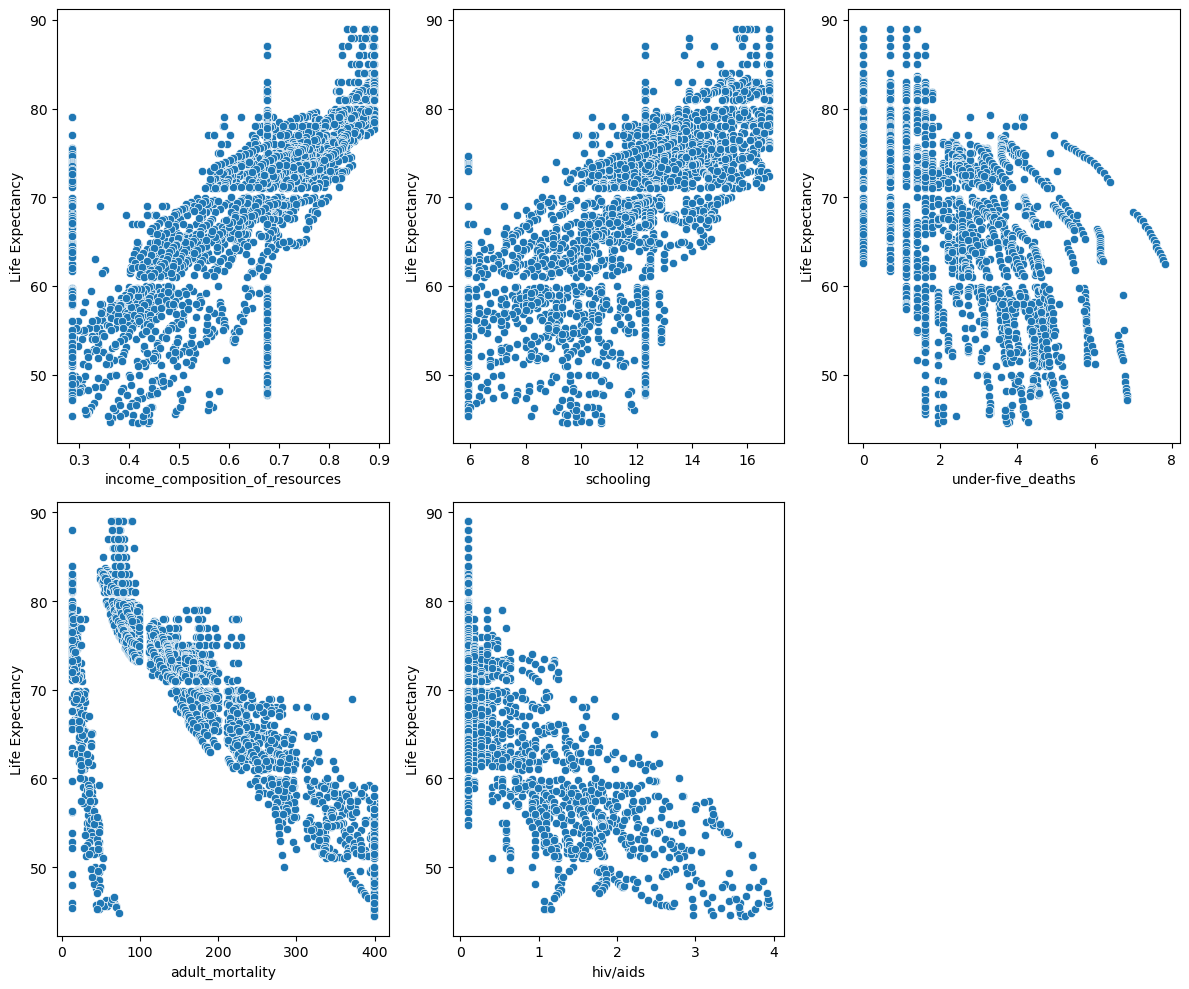

In [523]:
selected_features = correlation_with_life_exp[abs(correlation_with_life_exp)>0.6].index.tolist()
selected_features.remove('life_expectancy')
plt.figure(figsize=(12,10))
for i,feature in enumerate(selected_features,1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df[feature],y=df['life_expectancy'])
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
plt.tight_layout()
plt.show()


### Removing Features with weak correlation with life expectancy

In [525]:
weak_corr_features = correlation_with_life_exp[abs(correlation_with_life_exp)<0.3].index

final_df = df.drop(columns=weak_corr_features)

### Removing features which is highly correlated

In [527]:
high_corr_threshold = 0.85

to_remove=set()
for col in final_df.columns:
    if col in to_remove or col =='life_expectancy':
        continue
    for row in final_df.columns:
        if row!=col and row not in to_remove:
            if abs(corr_matrix.loc[col,row])>high_corr_threshold:
                print(row,',',col)
                to_remove.add(row)            

under-five_deaths , infant_deaths
thinness_5-9_years , thinness__1-19_years
schooling , income_composition_of_resources


In [528]:
final_df.drop(columns=to_remove,inplace=True)

In [529]:
final_df.columns

Index(['status', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'measles', 'bmi', 'polio', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years',
       'income_composition_of_resources', 'life_expectancy'],
      dtype='object')

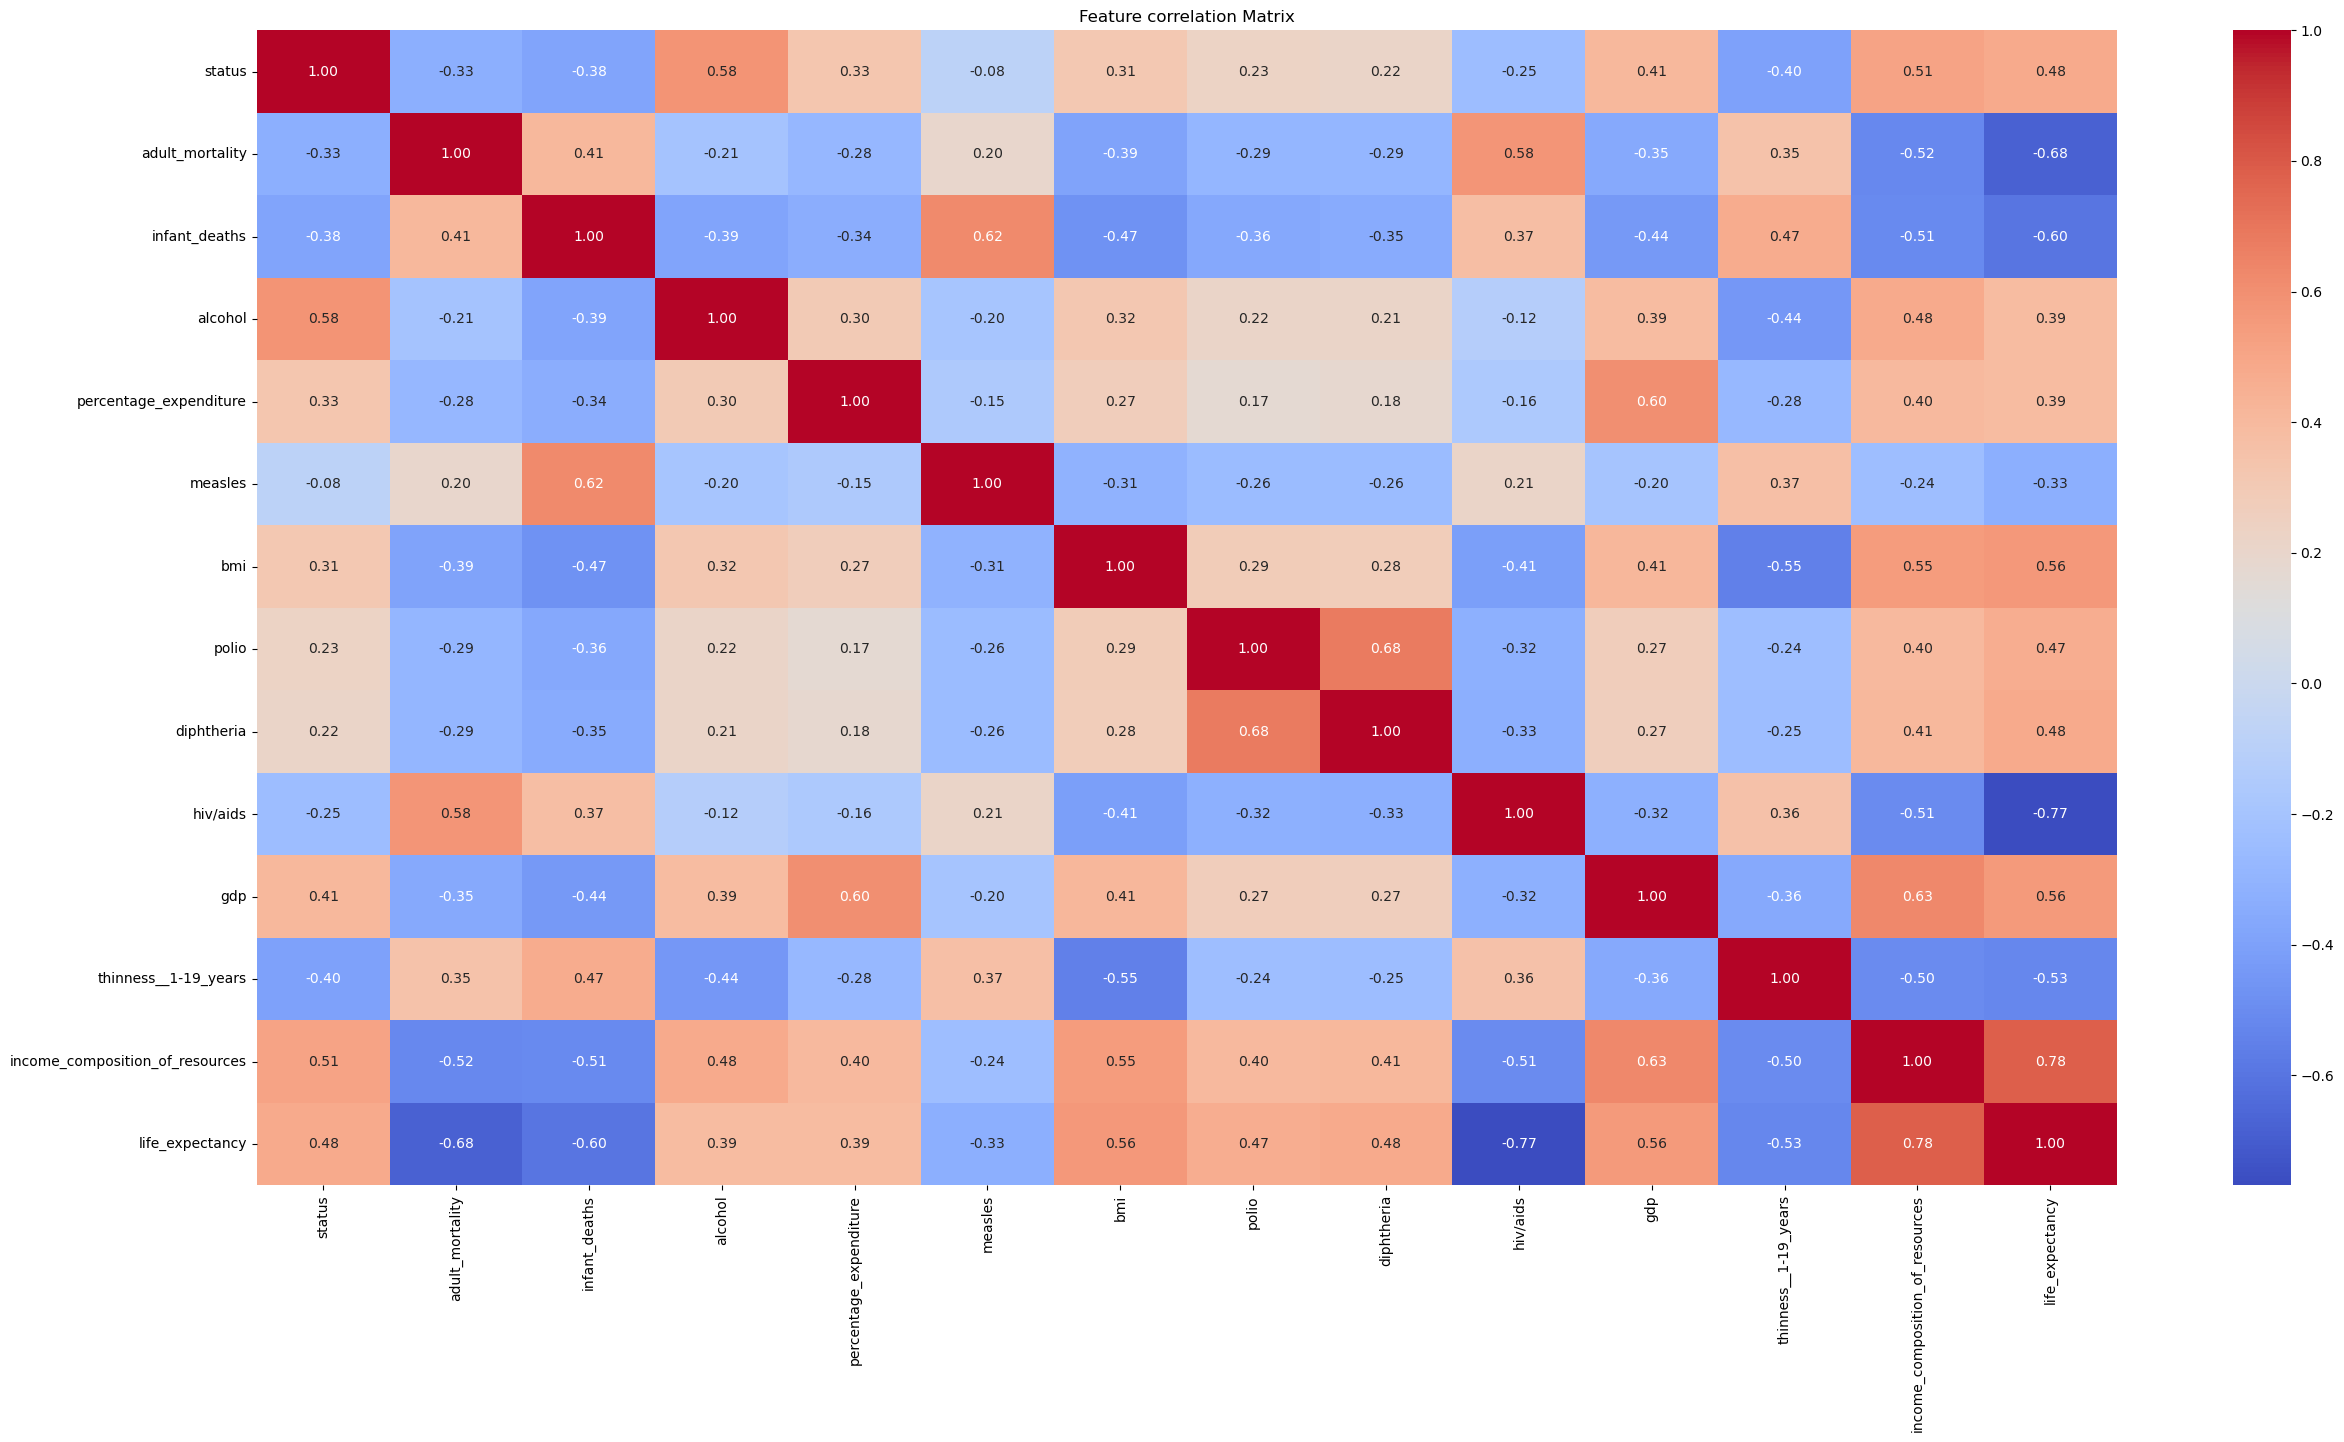

In [530]:
corr_matrix = final_df.corr()

plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Feature correlation Matrix')
plt.show()

In [531]:
cov_matrix = final_df.cov()
cov_matrix

,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,life_expectancy
status,0.142437,-13.540432,-0.240005,0.859087,0.334083,-0.099544,2.310399,1.979336,1.897712,-0.071182,0.269000,-0.570501,0.032982,1.702753
adult_mortality,-13.540432,11941.782466,73.894273,-87.966485,-83.170394,69.951758,-848.156984,-728.487596,-729.082553,47.925411,-67.043379,143.967895,-9.616320,-698.982484
infant_deaths,-0.240005,73.894273,2.768000,-2.510046,-1.527753,3.382529,-15.573078,-14.030914,-13.539738,0.471797,-1.273642,2.933385,-0.143873,-9.350026
alcohol,0.859087,-87.966485,-2.510046,15.316641,3.168029,-2.496371,24.911798,19.582481,19.609998,-0.369917,2.649661,-6.542901,0.319857,14.358619
percentage_expenditure,0.334083,-83.170394,-1.527753,3.168029,7.396065,-1.374181,14.515675,10.516418,11.405577,-0.334600,2.824376,-2.820767,0.185280,9.895794
measles,-0.099544,69.951758,3.382529,-2.496371,-1.374181,10.699475,-20.154713,-19.301920,-19.644710,0.531445,-1.136239,4.551323,-0.134832,-10.084121
bmi,2.310399,-848.156984,-15.573078,24.911798,14.515675,-20.154713,390.093833,130.829583,129.771367,-6.183203,14.165322,-41.067727,1.838429,103.788594
polio,1.979336,-728.487596,-14.030914,19.582481,10.516418,-19.301920,130.829583,534.720930,366.873350,-5.697937,10.852517,-21.056383,1.594098,101.308085
diphtheria,1.897712,-729.082553,-13.539738,19.609998,11.405577,-19.644710,129.771367,366.873350,545.720392,-5.858155,10.795943,-21.870121,1.630316,104.209371
hiv/aids,-0.071182,47.925411,0.471797,-0.369917,-0.334600,0.531445,-6.183203,-5.697937,-5.858155,0.581136,-0.425001,1.023361,-0.065704,-5.492081


**Summary of Findings:**

Features like Income Composition of Resources , schooling and GDP increases Life Expectancy.

While Feature like HIV/AIDS , adult mortality , Under-five Deaths decreases Life Expectancy.

Conclusion - Economic, health, and education factors significantly impact life expectancy

## Statistical Analysis

### Computing confidence interval

In [535]:
import scipy.stats as stats

life_expectancy = final_df['life_expectancy']
mean =np.mean(life_expectancy)
std = np.std(life_expectancy)
n=len(life_expectancy)

confidence = 0.95
margin_error = stats.t.ppf((1+confidence)/2,df=n-1)*(std/np.sqrt(n))
lower_bound = mean-margin_error
upper_bound = mean+margin_error

print(f'95% Confidence for life expectancy: ({lower_bound:.2f},{upper_bound:.2f})')

95% Confidence for life expectancy: (68.98,69.66)


This means that, based on your sample, the true population mean life expectancy is likely between **68.98 and 69.66 years.**

### Performing T-test

**Problem Statement**: The mean life expectancy of a sample significantly differs from the population mean.


Null Hypothesis(H0): The sample mean is equal to the population mean.

Alterneng Hypothesis(H1): The sample mean is different from the population mean.

Choose the Significant Level(α) to be: 5%


In [538]:
from scipy.stats import ttest_1samp

sample_data = final_df['life_expectancy'].sample(30,random_state=42)
population_mean = final_df['life_expectancy'].mean()

print(f'Sample mean: {sample_data.mean():.2f}')
print(f'Population mean: {population_mean:.2f}')

t_stat,p_value = ttest_1samp(sample_data,population_mean)

print(f'T-Statistics: {t_stat}, P-Value: {p_value}')

if p_value<0.05:
    print('Reject Null Hypothesis: The sample mean is significantly different from the population mean.')
else:
    print("Fail to Reject Null Hypothesis: No significant difference between sample and population mean.")

Sample mean: 67.33
Population mean: 69.32
T-Statistics: -1.0165303242756851, P-Value: 0.3177832116342796
Fail to Reject Null Hypothesis: No significant difference between sample and population mean.


This suggests that the sample life expectancy is not significantly different from the population life expectancy.


### Performing Chi-Square Test

**Problem Statement**: Testing association between country Status and Life Expectancy categories.

**NOTE**: Discretize Life expectancy into categores using quantiles(Low,High)

Null Hypothesis(H0): The two variables are independent.

Alterneng Hypothesis(H1): The two variables are not independent.

Choose the Significant Level(α) to be: 5%: 5%


In [541]:
from scipy.stats import chi2_contingency

final_df['life_expectancy_category'] = pd.qcut(final_df['life_expectancy'],q=2,labels=['Low','High'])

contingency_table = pd.crosstab(final_df['status'],final_df['life_expectancy_category'])

chi2_stat,p_value,dof,expected = chi2_contingency(contingency_table)
print(f'Chi_Square Statistics = {chi2_stat:.4f}, p_value = {p_value:.5f}')

if p_value< 0.05:
    print("Reject Null Hypothesis: Life expectancy is significantly associated with Country Status")
else:
    print("Fail to Reject Null Hypothesis: No significant association between Life Expectancy and Country Status")

Chi_Square Statistics = 503.9067, p_value = 0.00000
Reject Null Hypothesis: Life expectancy is significantly associated with Country Status


In [542]:
contingency_table

life_expectancy_category,Low,High
status,,
0,1418,956
1,20,473


In [543]:
expected

array([[1190.72619463, 1183.27380537],
       [ 247.27380537,  245.72619463]])

This indicates that country status (Developed vs. Developing) strongly influences life expectancy.

### Performing ANOVA Test

**Problem Statement**: Testing if GDP significantly affects life expectancy

**NOTE**: Discretize Life expectancy and GDP into categories using quantiles(low,medium,high)

Null Hypothesis(H0): The two variables are independent.

Alterneng Hypothesis(H1): The two variables are not independent.

Choose the Significant Level(α) to be: 5%: 5%


In [546]:
from scipy.stats import f_oneway

final_df['gdp_category'] = pd.qcut(final_df['gdp'],q=3,labels=['Low','Medium','High'])


low_gdp = final_df[final_df['gdp_category']=='Low']['life_expectancy']
medium_gdp = final_df[final_df['gdp_category']=='Medium']['life_expectancy']
high_gdp = final_df[final_df['gdp_category']=='High']['life_expectancy']

f_stat,p_value = f_oneway(low_gdp,medium_gdp,high_gdp)
print(f'ANOVA Statistics = {f_stat}, P-Value={p_value}')

if p_value <0.05:
    print("Reject Null Hypothesis: GDP significantly affects Life Expectancy")
else:
    print("Fail to Reject Null Hypothesis: No significant effect of GDP on Life Expectancy")
    

ANOVA Statistics = 576.6721993094746, P-Value=3.5044120929461578e-211
Reject Null Hypothesis: GDP significantly affects Life Expectancy


This means GDP has a significant effect on life expectancy, likely indicating that higher GDP leads to higher life expectancy.

**Summary of Findings:**

Life expectancy (true mean) is likely between 68.98 and 69.66 years.

No significant difference between the sample and population mean life expectancy.

Life expectancy is significantly associated with country status (Developed vs. Developing).

GDP has a strong, statistically significant effect on life expectancy.